In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
# import sklearn functions
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

## Evaluation

### Metrics We're Focusing on Today:

#### $$\mathbf{Accuracy} : \frac{(TP + TN)}{(TP + TN + FP + FN)}$$

- Easy to understand
- Can be misleading when working with imbalanced class problems
- Does not matter what your "positive" is... b/c the numerator is TP + TN.

#### $$\mathbf{Precision} : \frac{TP}{(TP + FP)}$$
- Use when FP is more costly than FN
- e.g. spam filter

#### $$\mathbf{Recall} : \frac{TP}{(TP + FN)}$$
- Use when FN is more costly than FP
- e.g. credit card fraud detection
<br>
<br>
<br>

#### Baseline Prediction/Model
- Predict most common all the time
    - All Positive
    - All Negative

#### What do you care about?
- Minimizing false positives --> Precision
- Minimizing false negatives --> Recall
- Both Precision and Recall --> F1 score

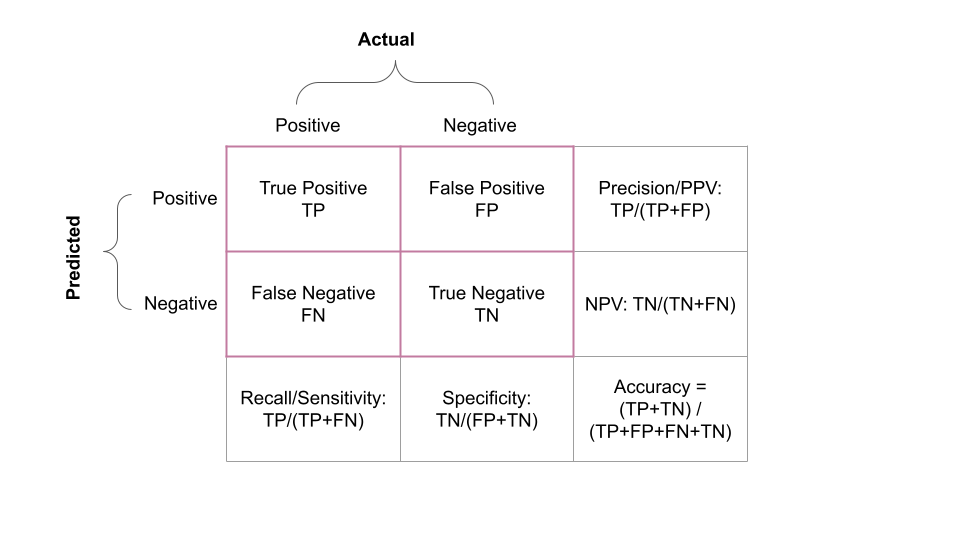


#### sklearn.metrics
- `accuracy_score(`y_actual,y_pred`)`
- `precision_score(`y_actual,y_pred,`labels=`['no', 'yes'],`average=`None`)`
- `recall_score(`y_actual,y_pred,`labels=`['no', 'yes'],`average=`None`)`
- `classification_report(`y_actual,y_pred,`labels=`['no', 'yes']`)`

## Exercises

Given the following confusion matrix, evaluate (by hand) the model's performance.


|               | pred dog   | pred cat   |
|:------------  |-----------:|-----------:|
| actual dog    |         46 |         7  |
| actual cat    |         13 |         34 |

In the context of this problem, what is a false positive?
In the context of this problem, what is a false negative?
How would you describe this model?


In [3]:
df = [[46,7],
        [13,34]]
df = pd.DataFrame(data=df, index=['actual_dog','actual_cat'], columns=['pred_dog','pred_cat'])
df

,pred_dog,pred_cat
actual_dog,46,7
actual_cat,13,34


In [4]:
model_accuracy = (df.pred_dog[0]+df.pred_cat[1])/(df.sum().sum())
print(f'   model accuracy: {model_accuracy:.2%}')

   model accuracy: 80.00%


In [5]:
model_precision = (df.pred_dog[0])/(df.pred_dog[0]+df.pred_dog[1])
print(f'model precision: {model_precision:.2%}')

model precision: 77.97%


In [6]:
model_recall = (df.pred_dog[0])/(df.pred_dog[0]+df.pred_cat[0])
print(f'   model recall: {model_recall:.2%}')

   model recall: 86.79%


In [7]:
# FP = pred dog, actual cat
# FN = pred cat, actual dog
# decent predictions, 80% accuracy

You are working as a data scientist working for Codeup Cody Creator (C3 for short), a rubber-duck manufacturing plant.

Unfortunately, some of the rubber ducks that are produced will have defects. Your team has built several models that try to predict those defects.

In [8]:
c3 = pd.read_csv('c3.csv')
c3

,actual,model1,model2,model3
0,No Defect,No Defect,Defect,No Defect
1,No Defect,No Defect,Defect,Defect
2,No Defect,No Defect,Defect,No Defect
3,No Defect,Defect,Defect,Defect
4,No Defect,No Defect,Defect,No Defect
...,...,...,...,...
195,No Defect,No Defect,Defect,Defect
196,Defect,Defect,No Defect,No Defect
197,No Defect,No Defect,No Defect,No Defect
198,No Defect,No Defect,Defect,Defect


In [9]:
c3.actual.value_counts()

No Defect    184
Defect        16
Name: actual, dtype: int64

In [10]:
def acc(df,model):
    model_accuracy = (df[model] == df.actual).mean()
    print(f'   {model} accuracy: {model_accuracy:.2%}')
def prc(df,model,pos_prediction):
    subset = df[df[model] == pos_prediction]
    model_precision = (subset[model] == subset.actual).mean()
    print(f'{model} precision: {model_precision:.2%}')
def rec(df,model,pos_actual):
    subset = df[df.actual == pos_actual]
    model_recall = (subset[model] == subset.actual).mean()
    print(f'   {model} recall: {model_recall:.2%}')

Use the predictions dataset and pandas to help answer the following questions:

- An internal team wants to investigate the cause of the manufacturing defects. They tell you that they want to identify as many of the ducks that have a defect as possible. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?


In [11]:
# Recall - minimize Defect not being predicted
for col in ['model1','model2','model3']:
    rec(c3,col,'Defect')
# model3

   model1 recall: 50.00%
   model2 recall: 56.25%
   model3 recall: 81.25%


In [12]:
for col in c3.iloc[:,1:].columns.to_list():
    print(col,recall_score(c3.actual,c3[col],labels=['Defect'],average=None))

model1 [0.5]
model2 [0.5625]
model3 [0.8125]


- Recently several stories in the local news have come out highlighting customers who received a rubber duck with a defect, and portraying C3 in a bad light. The PR team has decided to launch a program that gives customers with a defective duck a vacation to Hawaii. They need you to predict which ducks will have defects, but tell you the really don't want to accidentally give out a vacation package when the duck really doesn't have a defect. Which evaluation metric would be appropriate here? Which model would be the best fit for this use case?


In [13]:
# Precision - minimize Defect being falsely predicted
# for col in ['model1','model2','model3']:
for col in c3.iloc[:,1:].columns.to_list():
    prc(c3,col,'Defect')
# model1

model1 precision: 80.00%
model2 precision: 10.00%
model3 precision: 13.13%


In [14]:
for col in c3.iloc[:,1:].columns.to_list():
    print(col,precision_score(c3.actual,c3[col],labels=['Defect'],average=None))

model1 [0.8]
model2 [0.1]
model3 [0.13131313]


You are working as a data scientist for Gives You Paws ™, a subscription based service that shows you cute pictures of dogs or cats (or both for an additional fee).

At Gives You Paws, anyone can upload pictures of their cats or dogs. The photos are then put through a two step process. First an automated algorithm tags pictures as either a cat or a dog (Phase I). Next, the photos that have been initially identified are put through another round of review, possibly with some human oversight, before being presented to the users (Phase II).

Several models have already been developed with the data.

In [15]:
gyp = pd.read_csv('gives_you_paws.csv')
gyp

,actual,model1,model2,model3,model4
0,cat,cat,dog,cat,dog
1,dog,dog,cat,cat,dog
2,dog,cat,cat,cat,dog
3,dog,dog,dog,cat,dog
4,cat,cat,cat,dog,dog
...,...,...,...,...,...
4995,dog,dog,dog,dog,dog
4996,dog,dog,cat,cat,dog
4997,dog,cat,cat,dog,dog
4998,cat,cat,cat,cat,dog


In [16]:
gyp.actual.value_counts()

dog    3254
cat    1746
Name: actual, dtype: int64

Given this dataset, use pandas to create a baseline model (i.e. a model that just predicts the most common class) and answer the following questions:



In [17]:
gyp['baseline'] = gyp.actual.value_counts().index.max()
gyp.sample()

,actual,model1,model2,model3,model4,baseline
3,dog,dog,dog,cat,dog,dog


- In terms of accuracy, how do the various models compare to the baseline model? Are any of the models better than the baseline?


In [18]:
for col in gyp.iloc[:,1:].columns.to_list():
    acc(gyp,col)
# model1 better than baseline

   model1 accuracy: 80.74%
   model2 accuracy: 63.04%
   model3 accuracy: 50.96%
   model4 accuracy: 74.26%
   baseline accuracy: 65.08%


In [19]:
for col in gyp.iloc[:,1:].columns.to_list():
    print(col,accuracy_score(gyp.actual,gyp[col]))

model1 0.8074
model2 0.6304
model3 0.5096
model4 0.7426
baseline 0.6508


- Suppose you are working on a team that solely deals with dog pictures. Which of these models would you recommend?


In [20]:
# recall - actual_dog
for col in gyp.iloc[:,1:].columns.to_list():
    rec(gyp,col,'dog')

   model1 recall: 80.33%
   model2 recall: 49.08%
   model3 recall: 50.86%
   model4 recall: 95.57%
   baseline recall: 100.00%


In [21]:
for col in gyp.iloc[:,1:].columns.to_list():
    print(col,recall_score(gyp.actual,gyp[col],labels=['dog'],average=None))

model1 [0.80331899]
model2 [0.49078058]
model3 [0.50860479]
model4 [0.95574677]
baseline [1.]


In [29]:
subset1 = gyp[gyp.model1 == 'dog']
subset2 = gyp[gyp.model2 == 'dog']
subset3 = gyp[gyp.model3 == 'dog']
subset4 = gyp[gyp.model4 == 'dog']

In [35]:
(subset1.actual == subset1.model1).mean()


0.8900238338440586

In [36]:
(subset2.actual == subset2.model2).mean()


0.8931767337807607

In [37]:
(subset3.actual == subset3.model3).mean()


0.6598883572567783

In [38]:
(subset4.actual == subset4.model4).mean()

0.7312485304490948

In [ ]:
# recommend model2

In [26]:
for col in gyp.iloc[:,1:].columns.to_list():
    print(col,'\n',classification_report(gyp.actual,gyp[col],labels=['dog']))

model1 
               precision    recall  f1-score   support

         dog       0.89      0.80      0.84      3254

   micro avg       0.89      0.80      0.84      3254
   macro avg       0.89      0.80      0.84      3254
weighted avg       0.89      0.80      0.84      3254

model2 
               precision    recall  f1-score   support

         dog       0.89      0.49      0.63      3254

   micro avg       0.89      0.49      0.63      3254
   macro avg       0.89      0.49      0.63      3254
weighted avg       0.89      0.49      0.63      3254

model3 
               precision    recall  f1-score   support

         dog       0.66      0.51      0.57      3254

   micro avg       0.66      0.51      0.57      3254
   macro avg       0.66      0.51      0.57      3254
weighted avg       0.66      0.51      0.57      3254

model4 
               precision    recall  f1-score   support

         dog       0.73      0.96      0.83      3254

   micro avg       0.73      0.96  

- Suppose you are working on a team that solely deals with cat pictures. Which of these models would you recommend?


In [22]:
# recall - actual_cat
for col in gyp.iloc[:,1:].columns.to_list():
    rec(gyp,col,'cat')


   model1 recall: 81.50%
   model2 recall: 89.06%
   model3 recall: 51.15%
   model4 recall: 34.54%
   baseline recall: 0.00%


In [39]:
model_pre = []
for model in gyp.columns[1:]:
    subset = gyp[gyp[model] == 'cat']
    precision = (subset.actual == subset[model]).mean()
    model_pre.append([model,precision])
model_pre

[['model1', 0.6897721764420747],
 ['model2', 0.4841220423412204],
 ['model3', 0.358346709470305],
 ['model4', 0.8072289156626506],
 ['baseline', nan]]

In [23]:
for col in gyp.iloc[:,1:].columns.to_list():
    print(col,recall_score(gyp.actual,gyp[col],labels=['cat'],average=None))

model1 [0.81500573]
model2 [0.8906071]
model3 [0.51145475]
model4 [0.34536082]
baseline [0.]


In [ ]:
# recommend model2 and model1 as backup

In [28]:
for col in gyp.iloc[:,1:-1].columns.to_list():
    print(col,'\n',classification_report(gyp.actual,gyp[col],labels=['cat']))

model1 
               precision    recall  f1-score   support

         cat       0.69      0.82      0.75      1746

   micro avg       0.69      0.82      0.75      1746
   macro avg       0.69      0.82      0.75      1746
weighted avg       0.69      0.82      0.75      1746

model2 
               precision    recall  f1-score   support

         cat       0.48      0.89      0.63      1746

   micro avg       0.48      0.89      0.63      1746
   macro avg       0.48      0.89      0.63      1746
weighted avg       0.48      0.89      0.63      1746

model3 
               precision    recall  f1-score   support

         cat       0.36      0.51      0.42      1746

   micro avg       0.36      0.51      0.42      1746
   macro avg       0.36      0.51      0.42      1746
weighted avg       0.36      0.51      0.42      1746

model4 
               precision    recall  f1-score   support

         cat       0.81      0.35      0.48      1746

   micro avg       0.81      0.35  

Follow the links below to read the documentation about each function, then apply those functions to the data from the previous problem.

- sklearn.metrics.accuracy_score
- sklearn.metrics.precision_score
- sklearn.metrics.recall_score
- sklearn.metrics.classification_report